In [1]:
%matplotlib notebook
#Import Statements
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as areas
from scipy.integrate import *
from scipy.optimize import *
from scipy.misc import *
from sympy import * 
import random as rd
import math
from warnings import filterwarnings
filterwarnings("ignore", category=plt.cbook.mplDeprecation)

In [2]:
def equals(a, b): 
    return abs(b - a) < 10E-9

def compute_error(a, b, f, estimate):
    exp = quad(f, a, b)
    err = estimate - exp[0]
    return err

def riemann_sum(a, b, n, f, m):
    x_vals = []
    y_vals = []
    valid_const = equals(m, 0) or equals(m, 0.5) or equals(m, 1)
    if not valid_const:
        print("The Riemann Constant, m, is supposed to be 0, 0.5, or 1")
        return
    k = float(b - a) / n
    sum = 0
    for p in range(0, n):
        x_val = a + (p + m) * k
        y_val = f(x_val)
        x_vals.append(x_val)
        y_vals.append(y_val)
        sum += y_val
    riemann_sum = k * sum
    error = compute_error(a, b, f, riemann_sum)
    return riemann_sum, x_vals, y_vals, error

def trapezoidal(a, b, n, f):
    sum = f(a) + f(b)
    k = (b - a) / (2 * n)
    x_vals = [a]
    y_vals = [f(a)]
    for p in range(1, n): 
        x_val = a + p * (b - a) / n
        y_val = f(x_val)
        x_vals.append(x_val)
        y_vals.append(y_val)
        sum = sum + 2 * y_val
    x_vals.append(b)
    y_vals.append(f(b))
    trapezoidal = k * sum
    error = compute_error(a, b, f, trapezoidal)
    return trapezoidal, x_vals, y_vals, error

def generate_simpson_coeff(n):
    iterations = int(n / 2)
    coeffs = [1, 4, 1]
    for i in range(1, iterations):
        coeffs[len(coeffs) - 1] += 1
        coeffs.append(4)
        coeffs.append(1)
    return coeffs

def simpsons(a, b, n, f):
    n = int(n)
    coefficients = generate_simpson_coeff(n)
    sum = 0
    k = 0
    dx = (b - a) / n
    x_vals = []
    y_vals = []
    for coeff in coefficients:
        x = a + dx * k
        y = f(x)
        x_vals.append(x)
        y_vals.append(y)
        sum += coeff * y
        k = k + 1
    simpson = dx / 3 * sum
    error = compute_error(a, b, f, simpson)
    return simpson, x_vals, y_vals, error
        
def determine_parabola(x1, x2, x3):
    matrix = Matrix([[x1**2, x1, 1, f(x1)],
                     [x2**2, x2, 1, f(x2)],
                     [x3**2, x3, 1, f(x3)]])
    m_rref = list(matrix.rref()[0])
    coeffs = []
    for num in range(0, len(m_rref)):
        if (num + 1) % 4 == 0:
            coeffs.append(m_rref[num])
    return lambda x : coeffs[0] * x**2 + coeffs[1] * x + coeffs[2] 

In [3]:
#Hard Code: Define Function Here
simple = lambda x : x**3 - 7 * x ** 2 - x + 3
normal_dist = lambda x : (math.e**(-x**2 / 2) / math.sqrt(2 * math.pi))
complicated = lambda x : math.sqrt(abs(math.sin(x)*(((x**2)*(math.e**(-x)))/math.sqrt(4 + x**2))))
trigonometric = lambda x : math.sin(x)**2*math.cos(x)

f = trigonometric
include_monte_carlo = True


def generate_y_values(x_vals, func = f):
    y_vals = []
    for i in x_vals:
        y_vals.append(func(i))
    return y_vals

In [4]:
def graph_riemann(x_vals, y_vals, dx, f, m, type_of_estimate = ""): 
    fig = plt.figure()
    plt.grid()
    fig.suptitle("Using " + type_of_estimate + " to Approximate Function")
    ax = fig.add_subplot(1, 1, 1)
    if len(x_vals) != len(y_vals):
        return
    num_intervals = len(x_vals)
    for i in range(0, num_intervals):
        rect = areas.Rectangle((x_vals[i] - (dx * m), 0), width=dx, height=y_vals[i], edgecolor='orange', facecolor='orange', alpha=0.5)
        ax.add_patch(rect)
    x = np.arange(x_vals[0] - dx * 2, x_vals[len(x_vals) - 1] + dx * 2, 0.05)
    y = generate_y_values(x)
    x_axis_x = np.arange(x_vals[0] - dx * 2, x_vals[len(x_vals) - 1] + dx * 2, 0.05)
    x_axis_y = np.zeros(len(x_axis_x))
    plt.plot(x, y)
    plt.plot(x_axis_x, x_axis_y)
    plt.show()
    
    
def graph_trapezoidal(x_vals, y_vals, dx, f):
    fig = plt.figure()
    plt.grid()
    fig.suptitle("Using the TRAPEZOIDAL RULE to Approximate Function")
    ax = fig.add_subplot(1, 1, 1)
    if len(x_vals) != len(y_vals):
        return
    num_intervals = len(x_vals)
    for i in range(0, num_intervals - 1):
        x1 = x_vals[i]
        x2 = x_vals[i + 1]
        y1 = y_vals[i]
        y2 = y_vals[i + 1]
        xt = [x1, x2, x2, x1]
        yt = [0, 0, y2, y1]
        ax.add_patch(areas.Polygon(xy=list(zip(xt,yt)), edgecolor='red', facecolor='red', fill=True, alpha=0.5))
    x = np.arange(x_vals[0] - dx * 2, x_vals[len(x_vals) - 1] + dx * 2, 0.05)
    y = generate_y_values(x)
    x_axis_x = np.arange(x_vals[0] - dx * 2, x_vals[len(x_vals) - 1] + dx * 2, 0.05)
    x_axis_y = np.zeros(len(x_axis_x))
    plt.plot(x, y)
    plt.plot(x_axis_x, x_axis_y)
    plt.show()
    return
     
def graph_simpsons(x_vals, y_vals, dx, f):
    colors = ["red", "orange", "yellow", "green", "blue", "purple"]
    fig = plt.figure()
    plt.grid()
    fig.suptitle("Using the SIMPSON'S RULE to Approximate Function")
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(x_vals, y_vals, s = 6, color = "blue")
    x = np.arange(x_vals[0] - dx * 2, x_vals[len(x_vals) - 1] + dx * 2, 0.05)
    y = generate_y_values(x)
    plt.plot(x, y, color = "black")
    c = 0
    for i in range(2, len(x_vals), 2):
        parabola = determine_parabola(x_vals[i - 2], x_vals[i - 1], x_vals[i])
        ix = np.linspace(x_vals[i - 2] - 0.1, x_vals[i] + 0.1)
        iy = parabola(ix)
        xi = np.linspace(x_vals[i - 2], x_vals[i])
        yi = parabola(xi)
        verts = [(xi[0], 0), *zip(xi, yi), (xi[len(xi) - 1], 0)]
        color_choice = colors[c % len(colors)]
        poly = areas.Polygon(verts, facecolor=color_choice, edgecolor=color_choice, linewidth=3, fill=True, alpha = 0.1)
        ax.add_patch(poly)
        plt.plot(ix, iy, color = color_choice)
        c += 1
    plt.show()
    
def compute_and_graph_riemann(a, b, n, f, m):
    type_of_estimate = ""
    if equals(m, 0):
        type_of_estimate = "LEFT RIEMANN SUM"
    elif equals(m, 0.5):
        type_of_estimate = "MIDPOINT RULE"
    elif equals(m, 1):
        type_of_estimate = "RIGHT RIEMANN SUM"
    else:
        return
    try:
        estimate, x_vals, y_vals, error = riemann_sum(a, b, n, f, m)
        print(type_of_estimate + " of the function from " + str(a) + " to " + str(b) + " in " + str(n) + " subintervals: ")
        print("\tEstimate: " + str(estimate))
        if (len(x_vals) < 100):
            print("\tX_VALS: ", x_vals)
            print("\tY_VALS: ", y_vals)
        else:
            print("\tX_VALS: list too large")
            print("\tY_VALS: list too large")
        print("\tError: ", error)
        dx = (b - a) / n
        graph_riemann(x_vals, y_vals, dx, f, m, type_of_estimate)
    except (ZeroDivisionError):
        print("ERROR DURING INTEGRAL APPROXIMATION OR ERROR CALCULATION: DIVISION BY ZERO!")

def compute_and_graph_trapezoidal(a, b, n, f):
    try:
        estimate, x_vals, y_vals, error = trapezoidal(a, b, n, f)
        print("TRAPEZOIDAL APPROXIMATION of the function from " + str(a) + " to " + str(b) + " in " + str(n) + " subintervals: ")
        print("\tEstimate: " + str(estimate))
        if (len(x_vals) < 100):
            print("\tX_VALS: ", x_vals)
            print("\tY_VALS: ", y_vals)
        else:
            print("\tX_VALS: list too large")
            print("\tY_VALS: list too large")
        print("\tError: ", error)
        dx = (b - a) / n
        graph_trapezoidal(x_vals, y_vals, dx, f)
    except (ZeroDivisionError):
        print("ERROR DURING INTEGRAL APPROXIMATION OR ERROR CALCULATION: DIVISION BY ZERO!")

def compute_and_graph_simpsons_rule(a, b, n, f):
    if not (n > 0 and n % 2 == 0):
        print("A SIMPSON'S RULE calculation was attempted. Unforunately, there is no result, as n has to be an even integer.")
        return 
    try:
        estimate, x_vals, y_vals, error = simpsons(a, b, n, f)
        print("SIMPSON'S RULE APPROXIMATION of the function from " + str(a) + " to " + str(b) + " in " + str(n) + " subintervals: ")
        print("\tEstimate: " + str(estimate))
        if (len(x_vals) < 100):
            print("\tX_VALS: ", x_vals)
            print("\tY_VALS: ", y_vals)
        else:
            print("\tX_VALS: list too large")
            print("\tY_VALS: list too large")
        print("\tError: ", error)
        dx = (b - a) / n
        graph_simpsons(x_vals, y_vals, dx, f)
    except (ZeroDivisionError):
        print("ERROR DURING INTEGRAL APPROXIMATION OR ERROR CALCULATION: DIVISION BY ZERO!")
    
def trapezoidal_rule(a, b, n, f):
    compute_and_graph_trapezoidal(a, b, n, f)

def right_riemann_sum(a, b, n, f):
    compute_and_graph_riemann(a, b, n, f, 1)

def midpoint_rule(a, b, n, f):
    compute_and_graph_riemann(a, b, n, f, 0.5)

def left_riemann_sum(a, b, n, f):
    compute_and_graph_riemann(a, b, n, f, 0)
    
def simpsons_rule(a, b, n, f):
    compute_and_graph_simpsons_rule(a, b, n, f)

Enter a left bound: -2
Enter a right bound: 5
Enter amount of subintervals: 10
LEFT RIEMANN SUM of the function from -2.0 to 5.0 in 10 subintervals: 
	Estimate: -0.24223152231519804
	X_VALS:  [-2.0, -1.3, -0.6000000000000001, 0.09999999999999964, 0.7999999999999998, 1.5, 2.1999999999999993, 2.8999999999999995, 3.5999999999999996, 4.3]
	Y_VALS:  [-0.34407928079937716, 0.24835778320618182, 0.26313442740069143, 0.009916919038104866, 0.35852510622210265, 0.07038325027462065, -0.3846834273034689, -0.055577879888048076, -0.17560712746970264, -0.3364148025599591]
	Error:  -0.19891878185931797


<IPython.core.display.Javascript object>


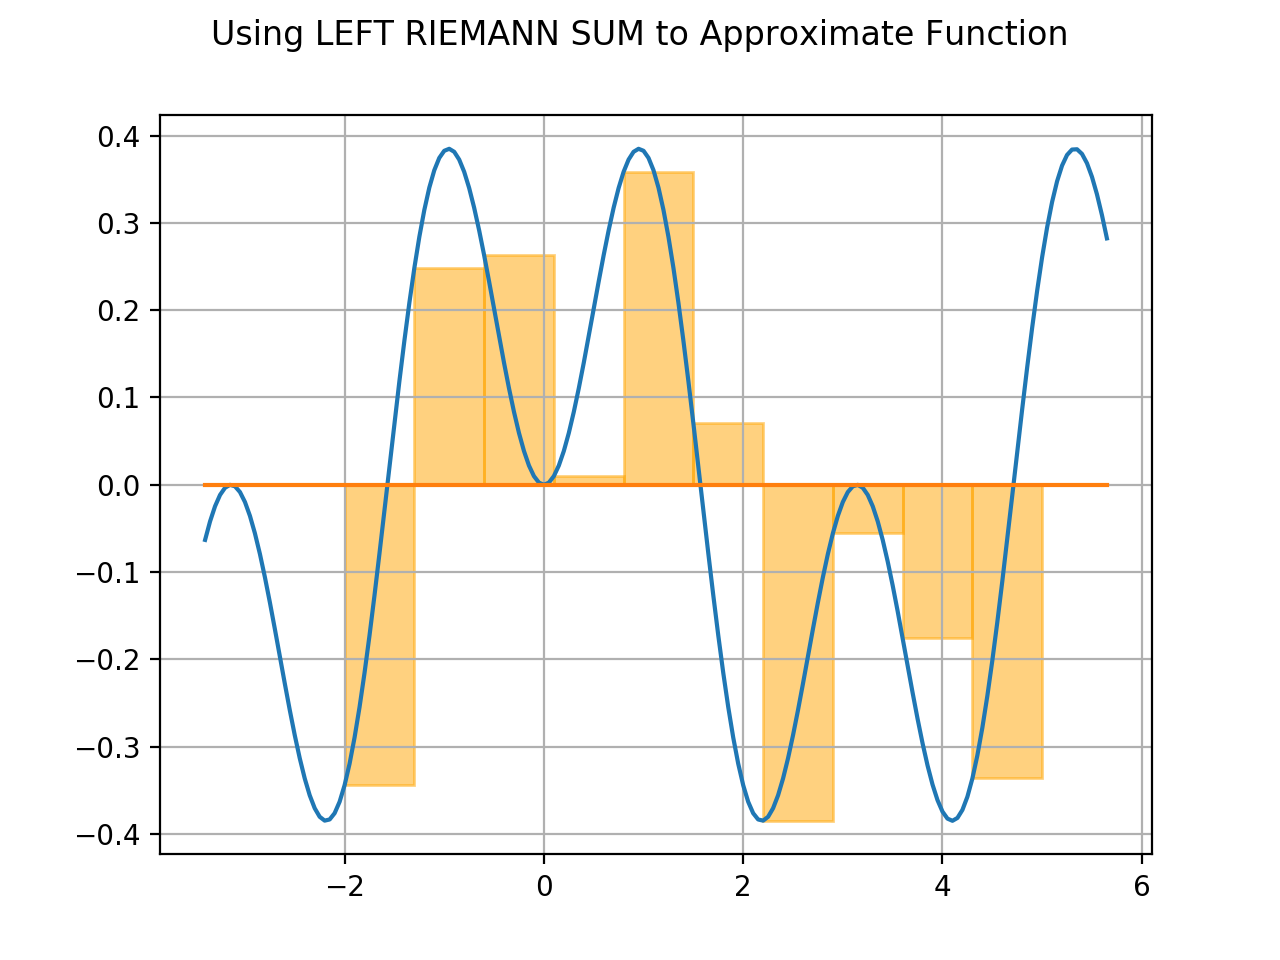

RIGHT RIEMANN SUM of the function from -2.0 to 5.0 in 10 subintervals: 
	Estimate: 0.1812102414507242
	X_VALS:  [-1.3, -0.6000000000000001, 0.09999999999999964, 0.7999999999999998, 1.5, 2.1999999999999993, 2.8999999999999995, 3.5999999999999996, 4.3, 5.0]
	Y_VALS:  [0.24835778320618182, 0.26313442740069143, 0.009916919038104866, 0.35852510622210265, 0.07038325027462065, -0.3846834273034689, -0.055577879888048076, -0.17560712746970264, -0.3364148025599591, 0.2608375245805119]
	Error:  0.22452298190660427


<IPython.core.display.Javascript object>


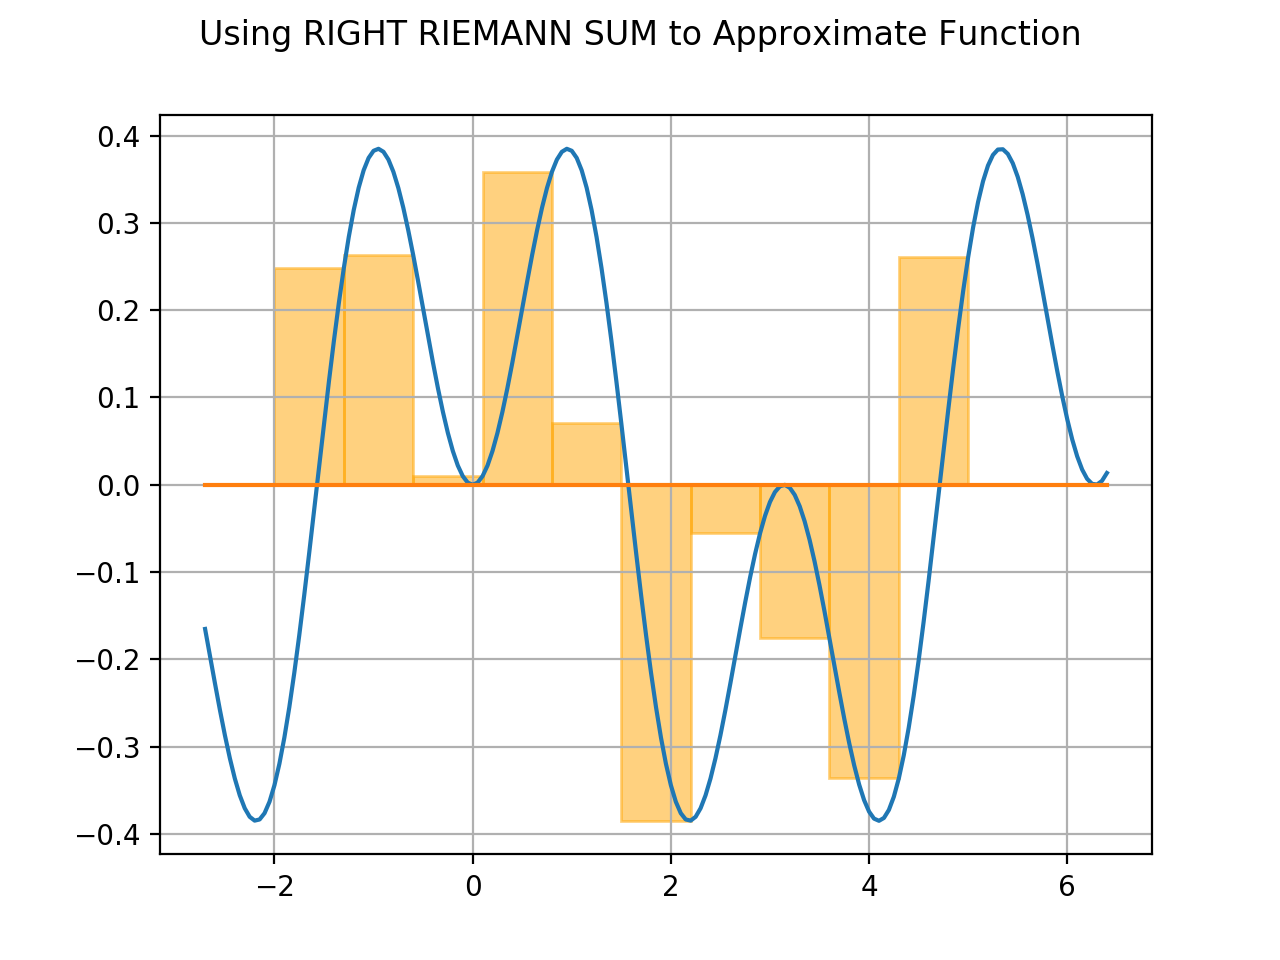

MIDPOINT RULE of the function from -2.0 to 5.0 in 10 subintervals: 
	Estimate: -0.05007486717430228
	X_VALS:  [-1.65, -0.9500000000000002, -0.25, 0.44999999999999973, 1.15, 1.8499999999999996, 2.55, 3.25, 3.9499999999999993, 4.6499999999999995]
	Y_VALS:  [-0.07862558294029617, 0.3848675817542435, 0.05930588820920598, 0.17036010381490865, 0.3403264138696155, -0.2546591719477304, -0.25815588682804175, -0.011637468025638255, -0.3612112575387836, -0.06210614490220105]
	Error:  -0.006762126718422211


<IPython.core.display.Javascript object>


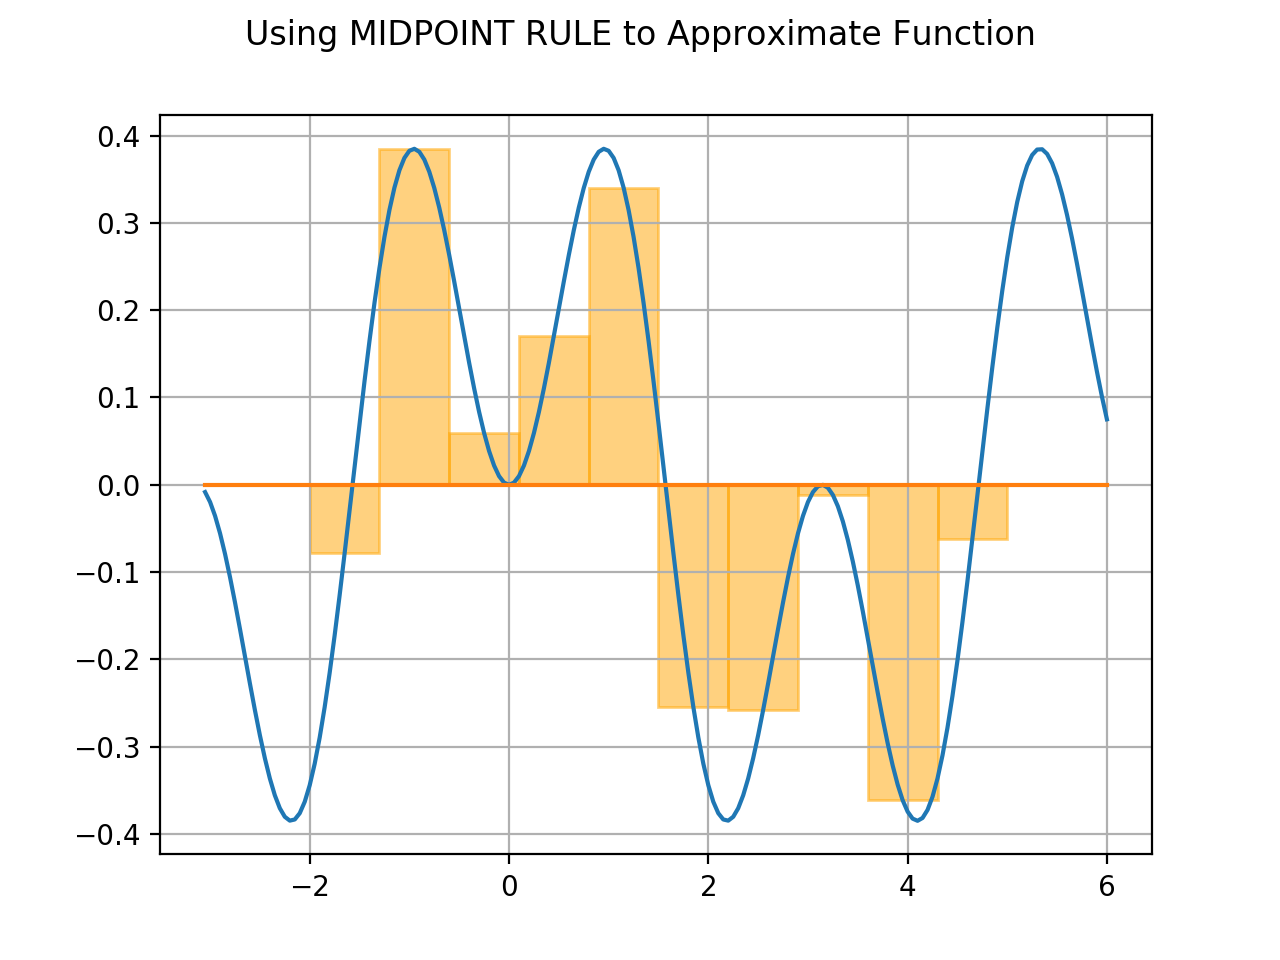

TRAPEZOIDAL APPROXIMATION of the function from -2.0 to 5.0 in 10 subintervals: 
	Estimate: -0.030510640432236523
	X_VALS:  [-2.0, -1.3, -0.6000000000000001, 0.10000000000000009, 0.7999999999999998, 1.5, 2.2, 2.9000000000000004, 3.5999999999999996, 4.3, 5.0]
	Y_VALS:  [-0.34407928079937716, 0.24835778320618182, 0.26313442740069143, 0.009916919038104953, 0.35852510622210265, 0.07038325027462065, -0.38468342730346883, -0.05557787988804769, -0.17560712746970264, -0.3364148025599591, 0.2608375245805119]
	Error:  0.01280210002364355


<IPython.core.display.Javascript object>


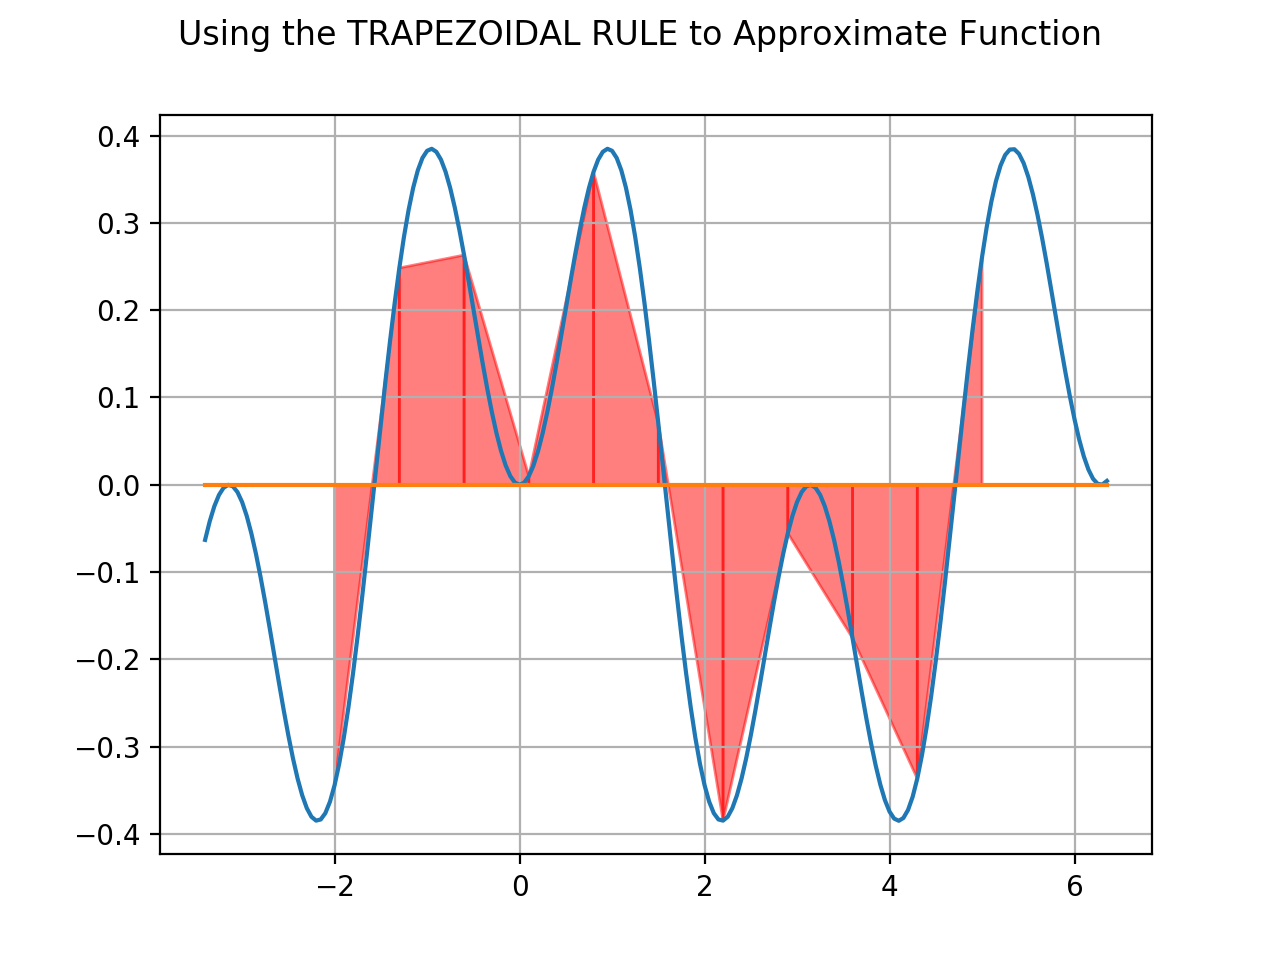

SIMPSON'S RULE APPROXIMATION of the function from -2.0 to 5.0 in 10 subintervals: 
	Estimate: -0.04989663425507119
	X_VALS:  [-2.0, -1.3, -0.6000000000000001, 0.09999999999999964, 0.7999999999999998, 1.5, 2.1999999999999993, 2.8999999999999995, 3.5999999999999996, 4.3, 5.0]
	Y_VALS:  [-0.34407928079937716, 0.24835778320618182, 0.26313442740069143, 0.009916919038104866, 0.35852510622210265, 0.07038325027462065, -0.3846834273034689, -0.055577879888048076, -0.17560712746970264, -0.3364148025599591, 0.2608375245805119]
	Error:  -0.0065838937991911164


<IPython.core.display.Javascript object>


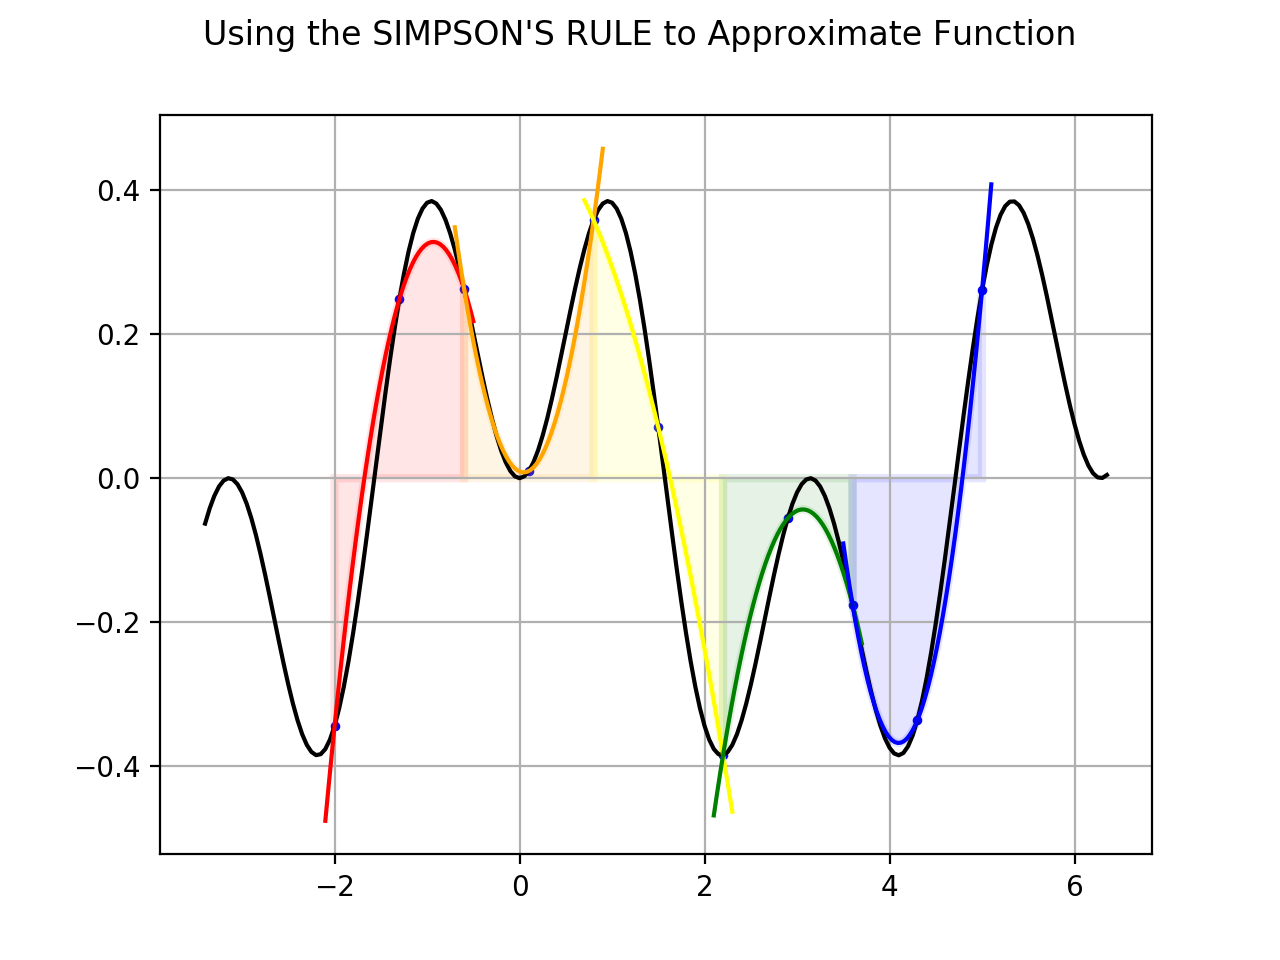

In [5]:
# Illustrating Integral Approximation Methods
a = float(eval(input("Enter a left bound: ")))
b = float(eval(input("Enter a right bound: ")))
n = int(input("Enter amount of subintervals: "))

left_riemann_sum(a, b, n, f)
right_riemann_sum(a, b, n, f)
midpoint_rule(a, b, n, f)
trapezoidal_rule(a, b, n, f)
simpsons_rule(a, b, n, f)

In [6]:
# Monte Carlo (Done for Fun)

"""
# MonteCarlo Methods
"""
#Assume the function is always continuous in the interval [a, b]

def find_roots(f, a, b):
    accuracy = 0.0001
    curr_y = f(a)
    estimates = []
    roots = []
    for dx in np.arange(a, b, accuracy):
        if (f(dx) < 0 and curr_y > 0) or (f(dx) > 0 and curr_y < 0):
            estimates.append(dx)
        curr_y = f(dx)
    for estimate in estimates:
        estimate = fsolve(f, estimate)[0]
        found = False
        for i in roots:
            if equals(i, estimate):
                found = True
        if not found and estimate < b and estimate > a:
            roots.append(estimate)
    return roots

def determine_intervals(a, roots, b):
    intervals = []
    if len(roots) == 0:
        intervals.append([a, b])
    else:
        intervals.append([a, roots[0]])
        for i in range(1, len(roots)):
            intervals.append([roots[i - 1], roots[i]])
        intervals.append([roots[len(roots) - 1], b])
    return intervals

def find_critical_points(interval, f):
    a = interval[0]
    b = interval[1]
    critical_pts_y = [f(a), f(b)]
    accuracy = 0.0001
    curr_y = derivative(f,a,dx=accuracy)
    for x in np.arange(a, b, accuracy):
        d = derivative(f,x,dx=accuracy)
        crossed_axis = (d < 0 and curr_y > 0) or (d > 0 and curr_y < 0)
        above_zero = equals(d, 0) and (curr_y < 0 or curr_y > 0)
        below_zero = equals(curr_y, 0) and (d < 0 or d > 0)
        if crossed_axis or above_zero or below_zero:
            critical_pts_y.append(f(x))
        curr_y = d
    return critical_pts_y
    
def calc_extreme_values(f, a, b):
    intervals = determine_intervals(a, find_roots(f, a, b), b)
    abs_min_max = []
    for interval in intervals:
        abs_min = np.min(find_critical_points(interval, f))
        abs_max = np.max(find_critical_points(interval, f))
        abs_min_max.append([abs_min, abs_max])
    return abs_min_max, intervals 

def generate_boxes(extreme_values, intervals, n):
    areas = []
    proportions = [] 
    samples = []
    sum_of_areas = 0
    i = 0
    for extreme_val in extreme_values:
        height = 0
        interval = intervals[i]
        if abs(extreme_val[0]) > abs(extreme_val[1]):
            height = extreme_val[0]
        else:
            height = extreme_val[1]
        area = height * (interval[1] - interval[0])
        sum_of_areas += abs(area)
        areas.append(area)
        i += 1
    for area in areas:
        proportions.append(abs(area/sum_of_areas))
        samples.append(int(n * proportions[len(proportions) - 1]))
    return areas, samples

def random_sampling(f, extreme, a, b, n):
    count = 0
    x_vals = []
    y_vals = []
    if n <= 0:
        return 0
    for i in range(0, n):
        x = rd.uniform(a, b)
        if abs(extreme[1]) > abs(extreme[0]): 
            y = rd.uniform(0, extreme[1])
        else:
            y = -rd.uniform(0, abs(extreme[0]))
        under_curve = abs(extreme[1]) > abs(extreme[0]) and y > 0 and y < f(x)
        above_curve = abs(extreme[1]) < abs(extreme[0]) and y < 0 and y > f(x) 
        if under_curve or above_curve:
            count += 1
            x_vals.append(x)
            y_vals.append(y)
    proportion = count / n
    return proportion, x_vals, y_vals

def monte_carlo_integration(f, a, b, samples, draw = False):
    extreme_values, intervals = calc_extreme_values(f, a, b)
    areas, num_samples = generate_boxes(extreme_values, intervals, samples)
    area = 0
    if draw:
        fig = plt.figure()
        x = np.arange(a, b, 0.05)
        y = generate_y_values(x)
        plt.plot(x, y)
    for index in range(0, len(areas)):
        if num_samples[index] != 0:
            proportion, x_vals, y_vals = random_sampling(f, extreme_values[index], intervals[index][0], intervals[index][1], num_samples[index])
            sectional_area = proportion * areas[index]
            area += sectional_area
            if draw:
                plt.scatter(x_vals, y_vals, s = 3, color = "green")
    if draw:
        fig.suptitle("Using the MONTE CARLO'S METHOD to Approximate Function\nArea = " + str(area))
        plt.show()
    return area

<IPython.core.display.Javascript object>


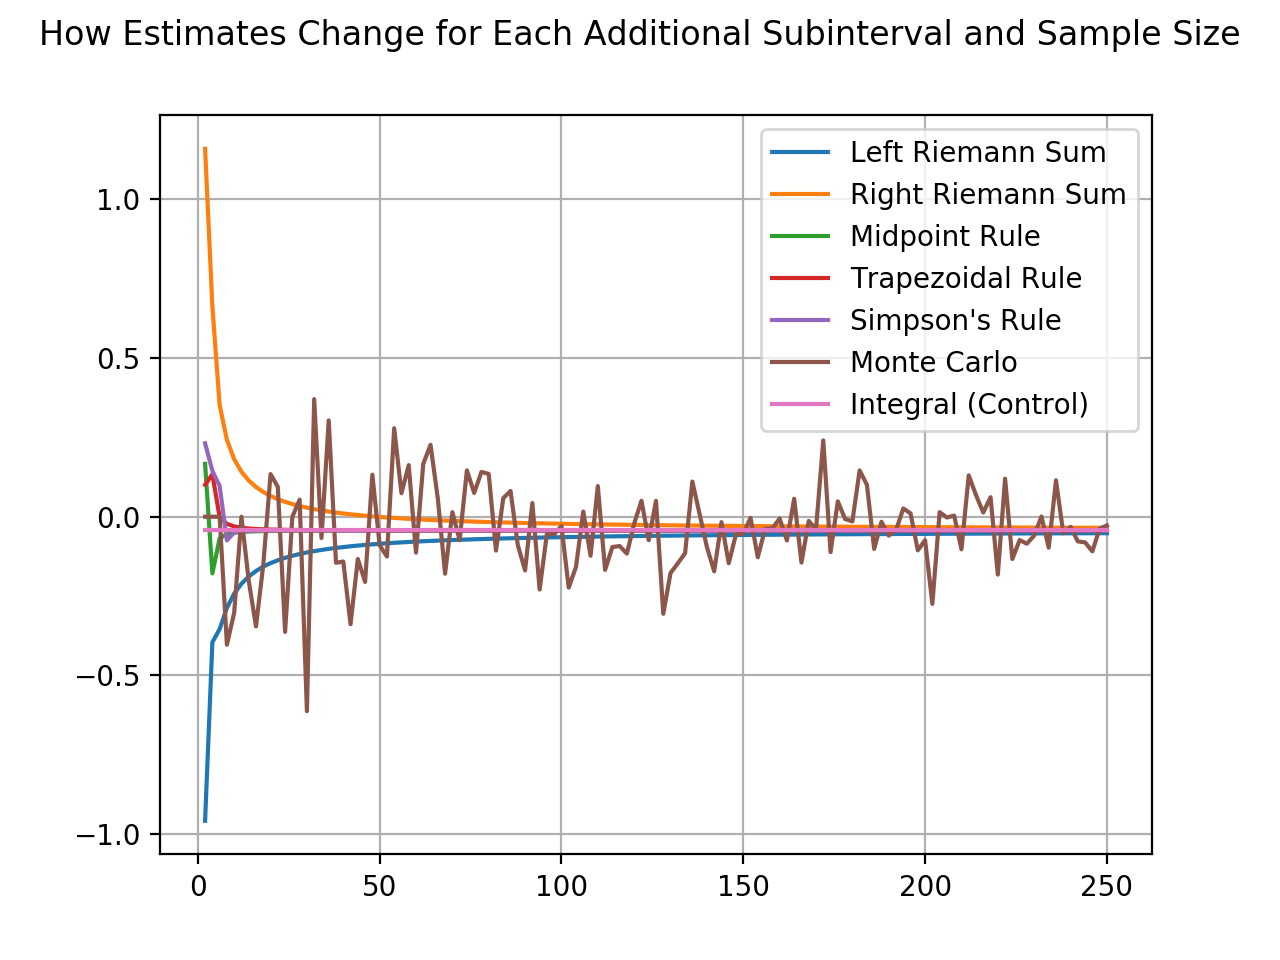

0
0.0
0.0
-0.4030665248875106
-0.302299893665633
0.0
-0.20153326244375536
-0.34548559276072344
-0.15114994683281646
0.13435550829583687
0.09415982373964349
-0.36275987239875956
0.0
0.053853171250892506
-0.612756850678452
0.3705482979482222
-0.06706678621536083
0.3034795944677362
-0.14496943234128634
-0.14101779974434991
-0.3386063398237891
-0.133120323527455
-0.20526102331965018
0.13260067852532187
-0.0898711046918107
-0.12523423934487332
0.2788662459355924
0.07416103232074833
0.16259705606419506
-0.11300398659393185
0.1667017984111645
0.22674557461393152
0.057179657247461435
-0.17945939929939958
0.014353838978163447
-0.07411765910536822
0.14601442252402885
0.07501974639853459
0.14115555102748428
0.13494535869688856
-0.10652111518190532
0.0585431015172474
0.08118554089876495
-0.0895102672975866
-0.16911221741325716
0.043247071634425205
-0.22921265642066335
-0.053928377311617315
-0.05520660096348046
-0.029536018238572548
-0.22329186205537999
-0.1578171513292273
0.01631786126663855
-0.12

<IPython.core.display.Javascript object>


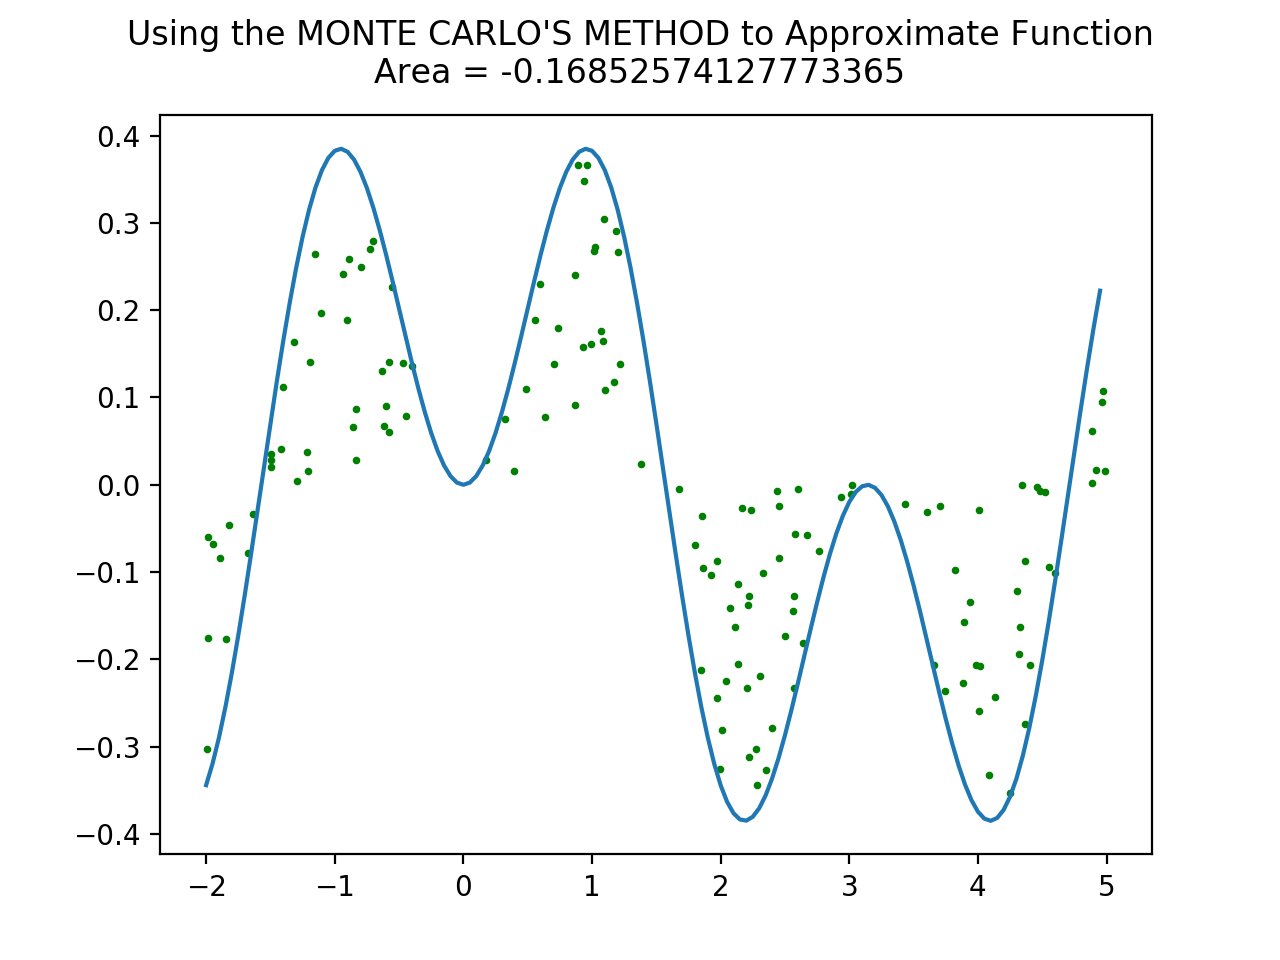

Monte Carlo Approximation:  -0.04225979630947228


In [7]:
# Comparing Integral Approximation Methods
fig = plt.figure()
plt.grid()
fig.suptitle("How Estimates Change for Each Additional Subinterval and Sample Size")
ax = fig.add_subplot(1, 1, 1)
num_intervals = []
lrs = []
rrs = []
mr  = []
tr  = []
sr  = []
mc  = []
integral = []
estimates = [lrs, rrs, mr, tr, sr, mc, integral]
labels = ["Left Riemann Sum", "Right Riemann Sum", "Midpoint Rule", 
          "Trapezoidal Rule", "Simpson's Rule", "Monte Carlo",
          "Integral (Control)"]
for n in range(2, 251, 2):
    num_intervals.append(n)
    lrs.append(riemann_sum(a, b, n, f, 0)[0])
    rrs.append(riemann_sum(a, b, n, f, 1)[0])
    mr.append(riemann_sum(a, b, n, f, 0.5)[0])
    tr.append(trapezoidal(a, b, n, f)[0])
    sr.append(simpsons(a, b, n, f)[0])
    if include_monte_carlo:
        area = monte_carlo_integration(f, a, b, n)
        print(area)
        mc.append(area)
    integral.append(quad(f, a, b)[0])
i = 0
for estimate_list in estimates:
    if ((not include_monte_carlo) and i != 5) or include_monte_carlo: 
        plt.plot(num_intervals, estimate_list, label = labels[i])
    i += 1
legend = ax.legend()
plt.show()
if include_monte_carlo:
    monte_carlo_approximation = np.mean(mc)
    monte_carlo_integration(f, a, b, 251, draw = True)
    print("Monte Carlo Approximation: ", monte_carlo_approximation)